##Import various python functions and modules that we need.

In [2]:
from pandas import DataFrame
from IPython.display import FileLink

##Pylab namespace and inline plots. Import Rmagic.

In [3]:
%matplotlib inline
%load_ext rpy2.ipython

In [4]:
%%R
workDir = '/home/chantal/Chazy/data/'
figDir = '/home/chantal/Chazy/Bulk/ITS/data/figs/'

physeqDir = '/home/chantal/Chazy/data/phyloseq/ITS/'
physeqBulk = 'bulk-core'


nprocs = 20

##Import R libraries we'll use.

In [5]:
%%R
library(phyloseq)
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)
library(vegan)
library(plyr) ;library(dplyr)
library(RColorBrewer)
library(stats)
library(ape)
library(stringr)
library(ade4)
library(reshape2)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Need help? Try the ggplot2 mailing list:
http://groups.google.com/group/ggplot2.

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: iterators

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: parallel

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106

## Calculating Faith's PD for different Treatments

In [6]:
%%R
F = file.path(physeqDir, physeqBulk)
physeq.Bulk = readRDS(F)
physeq.Bulk.m = physeq.Bulk %>% sample_data
physeq.Bulk = physeq.Bulk %>% filter_taxa(function(x) sum(x) > 0, TRUE)
#physeq.Bulk.Sparsity = filter_taxa(physeq.Bulk, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)

physeq.Bulk.m = physeq.Bulk %>% sample_data

physeq.NTH = prune_samples(physeq.Bulk.m$Land_Management == "NTH", physeq.Bulk)
physeq.PTH = prune_samples(physeq.Bulk.m$Land_Management == "PTH", physeq.Bulk)
physeq.NTR = prune_samples(physeq.Bulk.m$Land_Management == "NTR", physeq.Bulk)
physeq.PTR = prune_samples(physeq.Bulk.m$Land_Management == "PTR", physeq.Bulk)
physeq.NTH

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2199 taxa and 44 samples ]
sample_data() Sample Data:       [ 44 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 2199 taxa by 7 taxonomic ranks ]


In [44]:
%%R
rich.NTH = estimate_richness(physeq.NTH)
rich.NTH$Sample = rownames(rich.NTH)
rich.NTH$Till = 'N'
rich.NTH$OM = 'H'
rich.NTH = rich.NTH %>% tidyr::separate(Sample, c('Month', 'Treatment', 'Replicate'))
rownames(rich.NTH) = NULL

rich.PTH = estimate_richness(physeq.PTH)
rich.PTH$Sample = rownames(rich.PTH)
rich.PTH$Till = 'P'
rich.PTH$OM = 'H'
rich.PTH = rich.PTH %>% tidyr::separate(Sample, c('Month', 'Treatment', 'Replicate'))
rownames(rich.PTH) = NULL


rich.NTR = estimate_richness(physeq.NTR)
rich.NTR$Sample = rownames(rich.NTR)
rich.NTR$Till = 'N'
rich.NTR$OM = 'R'
rich.NTR = rich.NTR %>% tidyr::separate(Sample, c('Month', 'Treatment', 'Replicate'))
rownames(rich.NTR) = NULL


rich.PTR = estimate_richness(physeq.PTR)
rich.PTR$Sample = rownames(rich.PTR)
rich.PTR$Till = 'P'
rich.PTR$OM = 'R'
rich.PTR = rich.PTR %>% tidyr::separate(Sample, c('Month', 'Treatment', 'Replicate'))
rownames(rich.PTR) = NULL


In [45]:
%%R
combo.treat = rbind(rich.NTH, rich.PTH, rich.NTR, rich.PTR)

In [46]:
%%R
combo.treat %>% group_by(Treatment) %>% summarise_each(funs(mean, sd)) %>% as.data.frame


  Treatment Observed_mean Chao1_mean se.chao1_mean ACE_mean se.ACE_mean
1       NTH      235.3864   315.5025      24.76419 314.5513    9.137712
2       NTR      241.9318   302.4143      19.34094 306.0696    8.804087
3       PTH      215.8864   272.7335      19.65505 270.6394    8.247741
4       PTR      206.2045   257.3879      18.48135 257.9330    8.125825
  Shannon_mean Simpson_mean InvSimpson_mean Fisher_mean Month_mean
1     3.927722    0.9340509        26.17985    54.90367         NA
2     3.952291    0.9552062        27.77503    51.60763         NA
3     3.754441    0.9354012        22.20939    45.67361         NA
4     3.532172    0.9135241        18.15777    40.93724         NA
  Replicate_mean Till_mean OM_mean Observed_sd Chao1_sd se.chao1_sd   ACE_sd
1             NA        NA      NA    63.57168 91.00323   13.512116 85.00177
2             NA        NA      NA    73.26708 91.04331    8.096353 91.27145
3             NA        NA      NA    58.42436 73.65770    9.020483 73.078

In [65]:
%%R
head(combo.treat)

  Observed    Chao1  se.chao1      ACE    se.ACE  Shannon   Simpson InvSimpson
1      236 258.0370  9.823134 255.0631  7.679335 4.323874 0.9764772   42.51196
2      195 239.3333 15.420611 249.5293  8.109195 4.004375 0.9647770   28.39050
3      301 370.5122 21.028233 361.6672  9.187316 4.393739 0.9733596   37.53698
4      230 256.6400 11.521657 249.7899  7.519236 4.429062 0.9758658   41.43492
5      297 333.3654 12.166595 342.0932  8.826387 3.902690 0.9353850   15.47628
6      315 384.2778 19.486774 397.0125 10.126448 3.794826 0.9204523   12.57107
    Fisher  Month Treatment Replicate Till OM
1 48.49543 July15       NTH         3    N  H
2 47.36786   June       NTH         2    N  H
3 68.58513  April       NTH         2    N  H
4 53.30422  April       NTH         3    N  H
5 62.47702    Nov       NTH         1    N  H
6 68.61841    Oct       NTH         2    N  H


In [67]:
%%R
combo.treat %>% group_by(Treatment, Month) %>% select(Chao1) %>% 
        summarise(mean(Chao1), sd(Chao1)) %>% as.data.frame()

   Treatment  Month mean(Chao1) sd(Chao1)
1        NTH  April    262.1658  93.94967
2        NTH    Aug    375.7672  97.53539
3        NTH July14    326.0081  76.61846
4        NTH July15    289.1353  44.70803
5        NTH   June    250.3920  32.92380
6        NTH    Nov    380.5305 110.31947
7        NTH    Oct    321.2654  80.48130
8        NTH   Sept    281.7337  88.14955
9        NTR  April    214.3335  38.53156
10       NTR    Aug    364.3686  67.90062
11       NTR July14    229.7705 105.52415
12       NTR July15    224.0023 102.92857
13       NTR   June    238.6769  57.61029
14       NTR    Nov    362.7699  89.71390
15       NTR    Oct    371.2437  52.13537
16       NTR   Sept    293.6892  40.76831
17       PTH  April    186.5377  32.76482
18       PTH    Aug    258.0951  55.44218
19       PTH July14    260.2256  78.27686
20       PTH July15    269.3952  43.52231
21       PTH   June    234.5942  61.00631
22       PTH    Nov    313.4555  87.15521
23       PTH    Oct    305.6366  6

In [58]:
%%R
till.test = (aov(combo.treat$Chao1 ~ combo.treat$Treatment + combo.treat$Replicate))
summary(till.test)

                       Df  Sum Sq Mean Sq F value  Pr(>F)   
combo.treat$Treatment   3   93738   31246   4.766 0.00324 **
combo.treat$Replicate   3   35357   11786   1.798 0.14950   
Residuals             169 1107859    6555                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [49]:
%%R
till.test = (aov(combo.treat$Chao1 ~ combo.treat$Month + combo.treat$Replicate))
summary(till.test)

                       Df Sum Sq Mean Sq F value   Pr(>F)    
combo.treat$Month       7 311346   44478   8.244 1.31e-08 ***
combo.treat$Replicate   3  35357   11786   2.184   0.0918 .  
Residuals             165 890251    5395                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [59]:
%%R
TukeyHSD(till.test)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = combo.treat$Chao1 ~ combo.treat$Treatment + combo.treat$Replicate)

$`combo.treat$Treatment`
             diff        lwr         upr     p adj
NTR-NTH -13.08821  -57.87888  31.7024633 0.8730316
PTH-NTH -42.76898  -87.55965   2.0216865 0.0671109
PTR-NTH -58.11462 -102.90529 -13.3239455 0.0051663
PTH-NTR -29.68078  -74.47145  15.1098936 0.3168099
PTR-NTR -45.02641  -89.81708  -0.2357383 0.0482696
PTR-PTH -15.34563  -60.13630  29.4450385 0.8105848

$`combo.treat$Replicate`
          diff       lwr      upr     p adj
2-1  20.774438 -24.01623 65.56511 0.6254887
3-1  -7.612772 -52.40344 37.17790 0.9712508
4-1  26.651375 -18.13930 71.44205 0.4136910
3-2 -28.387210 -73.17788 16.40346 0.3566125
4-2   5.876937 -38.91373 50.66761 0.9863761
4-3  34.264147 -10.52652 79.05482 0.1977416



In [51]:
%%R
summary(aov(combo.treat$Chao1 ~ combo.treat$OM + combo.treat$Replicate))

                       Df  Sum Sq Mean Sq F value Pr(>F)
combo.treat$OM          1    8893    8893   1.275  0.260
combo.treat$Replicate   3   35357   11786   1.690  0.171
Residuals             171 1192704    6975               


### Pielou's Evenness

In [7]:
%%R
library(picante)

otu_tab.NTH = t(otu_table(physeq.NTH)) %>% as.data.frame

otu_tab.PTH = t(otu_table(physeq.PTH)) %>% as.data.frame

otu_tab.NTR = t(otu_table(physeq.NTR)) %>% as.data.frame

otu_tab.PTR = t(otu_table(physeq.PTR)) %>% as.data.frame


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: nlme

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘nlme’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:dplyr’:

    collapse


  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [38]:
%%R
#H - Shannons, S - Species Richness, J = Pielou's evenness

H.13CN <- diversity(otu_tab.NTH )
## Species richness (S) and Pielou's evenness (J):
S.13CN <- specnumber(otu_tab.NTH ) ## rowSums(BCI > 0) does the same...
J.13CN <- H.13CN/log(S.13CN)

NTH = as.data.frame(J.13CN)
colnames(NTH) = 'Pie_val'
NTH$Treatment = "NTH"

print(mean(J.13CN))
print(sd(J.13CN))

[1] 0.7229293
[1] 0.1064125


In [60]:
%%R
#H - Shannons, S - Species Richness, J = Pielou's evenness
H.13CP <- diversity(otu_tab.PTH)
## Species richness (S) and Pielou's evenness (J):
S.13CP <- specnumber(otu_tab.PTH) ## rowSums(BCI > 0) does the same...
J.13CP <- H.13CP/log(S.13CP)


PTH = as.data.frame(J.13CP)
colnames(PTH) = 'Pie_val'
PTH$Treatment = "PTH"
print(mean(J.13CP))
print(sd(J.13CP))

[1] 0.7033621
[1] 0.08172208


In [40]:
%%R
#H - Shannons, S - Species Richness, J = Pielou's evenness

H.13XN <- diversity(otu_tab.NTR )
## Species richness (S) and Pielou's evenness (J):
S.13XN <- specnumber(otu_tab.NTR ) ## rowSums(BCI > 0) does the same...
J.13XN <- H.13XN/log(S.13XN)

NTR = as.data.frame(J.13XN)
colnames(NTR) = 'Pie_val'
NTR$Treatment = "NTR"

J.13XN
print(mean(J.13XN))
print(sd(J.13XN))

[1] 0.7275275
[1] 0.05839002


In [41]:
%%R
#H - Shannons, S - Species Richness, J = Pielou's evenness

H.13XP <- diversity(otu_tab.PTR )
## Species richness (S) and Pielou's evenness (J):
S.13XP <- specnumber(otu_tab.PTR ) ## rowSums(BCI > 0) does the same...
J.13XP <- H.13XP/log(S.13XP)

PTR = as.data.frame(J.13XP)
colnames(PTR) = 'Pie_val'
PTR$Treatment = "PTR"

J.13XP
print(mean(J.13XP))
print(sd(J.13XP))

[1] 0.6666882
[1] 0.08883849


In [42]:
%%R
Pie_tot = rbind(NTH, PTH, NTR, PTR)
head(Pie_tot)

                 Pie_val Treatment
July15.NTH.3   0.7913629       NTH
June.NTH.2     0.7594112       NTH
April.NTH.2    0.7698710       NTH
April.NTH.3    0.8144535       NTH
Nov.NTH.1.2015 0.6854363       NTH
Oct.NTH.2.2015 0.6596746       NTH


In [52]:
%%R
Pie_tot$Till = ifelse(Pie_tot$Treatment %in% c('NTH', 'NTR'), "no-till", "Till")

In [53]:
%%R
Pie_tot$OM = ifelse(Pie_tot$Treatment %in% c('NTH', 'PTH'), "H", "R")

In [63]:
%%R
till.test = (aov(Pie_tot$Pie_val ~ Pie_tot$Treatment))
summary(till.test)

                   Df Sum Sq Mean Sq F value  Pr(>F)   
Pie_tot$Treatment   3 0.1012 0.03372   4.603 0.00399 **
Residuals         172 1.2601 0.00733                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [57]:
%%R
summary(aov(Pie_tot$Pie_val ~ Pie_tot$OM))

             Df Sum Sq  Mean Sq F value Pr(>F)
Pie_tot$OM    1 0.0113 0.011317   1.459  0.229
Residuals   174 1.3499 0.007758               


In [64]:
%%R
TukeyHSD(till.test)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Pie_tot$Pie_val ~ Pie_tot$Treatment)

$`Pie_tot$Treatment`
                diff         lwr          upr     p adj
NTR-NTH  0.004598205 -0.04274359  0.051940000 0.9943662
PTH-NTH -0.019567119 -0.06690891  0.027774675 0.7068752
PTR-NTH -0.056241109 -0.10358290 -0.008899315 0.0126929
PTH-NTR -0.024165325 -0.07150712  0.023176470 0.5487830
PTR-NTR -0.060839315 -0.10818111 -0.013497520 0.0057317
PTR-PTH -0.036673990 -0.08401578  0.010667804 0.1883959




## Import data into R. Prune to relevant samples (Chazy). 

In [5]:
%%R

F = file.path(physeqDir, physeqBulk)
physeq.Bulk = readRDS(F)
physeq.Bulk.m = physeq.Bulk %>% sample_data
physeq.Bulk = physeq.Bulk %>% filter_taxa(function(x) sum(x) > 0, TRUE)
#physeq.Bulk.Sparsity = filter_taxa(physeq.Bulk, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)

physeq.Bulk.m = physeq.Bulk %>% sample_data

physeq.Bulk.core = prune_samples(physeq.Bulk.m$Land_Management != "PAS", physeq.Bulk)

physeq.Bulk.m = physeq.Bulk.core %>% sample_data
    
physeq.Bulk.core = subset_taxa(physeq.Bulk.core, Rank1=="k__Fungi")
physeq.Bulk.m = physeq.Bulk.core %>% sample_data

    
physeq.Bulk.core = physeq.Bulk.core %>% transform_sample_counts(function(x) x/sum(x))

physeq.Bulk.m = physeq.Bulk.core %>% sample_data

#print(physeq.Bulk.Sparsity)
print(physeq.Bulk.core)


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2199 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 2199 taxa by 7 taxonomic ranks ]


In [ ]:
%%R
library(picante)

otu_tab.13CN = t(otu_table(df.13C.N.phyl)) %>% as.data.frame
tree.13CN = (phy_tree(df.13C.N.phyl))

otu_tab.13CP = t(otu_table(df.13C.P.phyl)) %>% as.data.frame
tree.13CP = (phy_tree(df.13C.P.phyl))

otu_tab.13XN = t(otu_table(df.13X.N.phyl)) %>% as.data.frame
tree.13XN = (phy_tree(df.13X.N.phyl))

otu_tab.13XP = t(otu_table(df.13X.P.phyl)) %>% as.data.frame
tree.13XP = (phy_tree(df.13X.P.phyl))



In [6]:
%%R
mdf = psmelt(physeq.Bulk.core)

In [7]:
%%R
samples = mdf %>% group_by(Sample) %>% summarise(seqs = sum(Abundance))
range(samples$seqs)

[1] 1 1


In [8]:
%%R
sample_data(physeq.Bulk.core)$Sample_Date = factor(sample_data(physeq.Bulk.core)$Sample_Date, 
                                        levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))

physeq.Bulk.m = physeq.Bulk.core %>% sample_data
sample_data(physeq.Bulk.core)$date.time = as.POSIXct(strptime(physeq.Bulk.m$Sample_Date,
                                                                          format = "%m/%d/%y"))


In [9]:
%%R
climate = read.csv('../515_806/Chazy-Climate.csv')

In [10]:
%%R
library(lubridate)
climate = filter(climate, !(is.na(Sample_date)))
climate$Month = months(as.Date(climate$Sample_date))
climate$Year = year(climate$Sample_date)
climate$MY = paste(climate$Month, climate$Year, sep = '-')

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘lubridate’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:plyr’:

    here


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:base’:

    date


  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [11]:
%%R
mean_Temp = climate %>% select(Sample_date, MY, AvgTemp) %>% group_by(MY) %>% mutate(min = dense_rank(AvgTemp)) %>% 
            #filter((min != min(min))) %>% 
            summarise(mean_mean = mean(AvgTemp)) 

mean_Temp %>% as.data.frame

               MY  mean_mean
1      April-2015  8.5000000
2     August-2015 19.3333333
3       July-2014 21.3333333
4       July-2015 21.3333333
5       June-2015 18.0000000
6   November-2014  3.5000000
7   November-2015  0.6666667
8    October-2014  9.3333333
9    October-2015  5.6666667
10 September-2014 12.6666667
11 September-2015 15.6666667


In [12]:
%%R
sample_data(physeq.Bulk.core)$MY = paste(sample_data(physeq.Bulk.core)$Month, sample_data(physeq.Bulk.core)$Year, sep = '-')
physeq.Bulk.m = physeq.Bulk.core %>% sample_data
physeq.test = left_join(physeq.Bulk.m, mean_Temp, by = 'MY')


In [13]:
%%R
sample_data(physeq.Bulk.core)$Alt_temp = physeq.test$mean_mean

In [14]:
%%R
physeq.Bulk.m = physeq.Bulk.core %>% sample_data
head(physeq.Bulk.m)


Sample Data:        [6 samples by 27 sample variables]:
                  Full.sample Fraction PrimerF PrimerR Barcode Rev.index
April.NTR.4       April.NTR.4       NA  nBITSf   58A2r     155  atagtacc
Aug.NTR.3.2015 Aug.NTR.3.2015       NA  nBITSf   58A2r     129  gatctacg
April.PTR.3       April.PTR.3       NA  nBITSf   58A2r     150  acgtgcgc
July15.NTH.3     July15.NTH.3       NA  nBITSf   58A2r     184  aacgctga
Nov.NTR.1           Nov.NTR.1       NA  nBITSf   58A2r     125  tctctatg
June.NTH.2         June.NTH.2       NA  nBITSf   58A2r     162  gcgtatac
               Fwd.index Treatment Day Pool     Experiment Gradient
April.NTR.4     tagcgagt       NTR  NA    4 Chazy.ITS.Bulk     <NA>
Aug.NTR.3.2015  atcgtacg       NTR  NA    5 Chazy.ITS.Bulk     <NA>
April.PTR.3     cgtgagtg       PTR  NA    4 Chazy.ITS.Bulk     <NA>
July15.NTH.3    gacaccgt       NTH  NA    4 Chazy.ITS.Bulk     <NA>
Nov.NTR.1       tcatcgag       NTR  NA    4 Chazy.ITS.Bulk     <NA>
June.NTH.2      actatctg 

### Calculate Unifrac distances between samples.

In [15]:
%%R
method = 'bray'

In [16]:
%%R
registerDoParallel(cores=20)
wunif.dist.nopas = phyloseq::distance(physeq.Bulk.core, 
                      method = method)

In [17]:
%%R
physeq.Bulk.core


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2199 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 2199 taxa by 7 taxonomic ranks ]


In [18]:
%%R
# Removing samples w/o soil temperature

physeq.Bulk.m = physeq.Bulk.core %>% sample_data

physeq.notemp = prune_samples(!(is.na(physeq.Bulk.m$Soil_Temp)), physeq.Bulk.core)

physeq.notemp 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2199 taxa and 128 samples ]
sample_data() Sample Data:       [ 128 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 2199 taxa by 7 taxonomic ranks ]


In [19]:
%%R
registerDoParallel(cores=20)
wunif.dist.notemp = phyloseq::distance(physeq.notemp, 
                      method = method)

In [20]:
%%R
# Removing samples w/o soil moisture
physeq.Bulk.m = physeq.Bulk.core %>% sample_data

physeq.nomoist = prune_samples(!(is.na(physeq.Bulk.m$Soil_Moisture)), physeq.Bulk.core)

physeq.nomoist

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2199 taxa and 160 samples ]
sample_data() Sample Data:       [ 160 samples by 27 sample variables ]
tax_table()   Taxonomy Table:    [ 2199 taxa by 7 taxonomic ranks ]


In [21]:
%%R
registerDoParallel(cores=20)
wunif.dist.nomoist = phyloseq::distance(physeq.nomoist, 
                      method = method)

### Adonis Statistics

In [109]:
%%R 
physeq.data = as(sample_data(physeq.Bulk.core), "data.frame")
test = adonis(wunif.dist.nopas ~ Land_Management*Sample_Date, physeq.data, strata = physeq.data$Replicate)


In [115]:
%%R
str(test)

List of 7
 $ aov.tab     :Classes ‘anova’ and 'data.frame':	5 obs. of  6 variables:
  ..$ Df       : num [1:5] 3 10 30 132 175
  ..$ SumsOfSqs: num [1:5] 6.43 5.35 5.24 21.57 38.6
  ..$ MeanSqs  : num [1:5] 2.145 0.535 0.175 0.163 NA
  ..$ F.Model  : num [1:5] 13.13 3.27 1.07 NA NA
  ..$ R2       : num [1:5] 0.167 0.139 0.136 0.559 1
  ..$ Pr(>F)   : num [1:5] 0.001 0.001 0.009 NA NA
  ..- attr(*, "heading")= chr [1:2] "Blocks:  strata \nPermutation: free\nNumber of permutations: 999\n" "Terms added sequentially (first to last)\n"
 $ call        : language adonis(formula = wunif.dist.nopas ~ Land_Management * Sample_Date, data = physeq.data,      strata = physeq.data$Replicate)
 $ coefficients: NULL
 $ coef.sites  : num [1:44, 1:176] 0.62904 -0.00905 -0.0866 0.04426 -0.02419 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:44] "(Intercept)" "Land_Management1" "Land_Management2" "Land_Management3" ...
  .. ..$ : NULL
 $ f.perms     : num [1:999, 1:3] 0.974 0.976 0.774 0.854 1.1

In [120]:
%%R
d = data.frame(test$aov.tab[, c("F.Model","R2", "Pr(>F)")])
d

                              F.Model        R2 Pr..F.
Land_Management             13.127987 0.1667182  0.001
Sample_Date                  3.274939 0.1386331  0.001
Land_Management:Sample_Date  1.069910 0.1358728  0.009
Residuals                          NA 0.5587759     NA
Total                              NA 1.0000000     NA


In [121]:
%%R
d = data.frame(test$aov.tab)
d

                             Df SumsOfSqs   MeanSqs   F.Model        R2 Pr..F.
Land_Management               3  6.434540 2.1448467 13.127987 0.1667182  0.001
Sample_Date                  10  5.350586 0.5350586  3.274939 0.1386331  0.001
Land_Management:Sample_Date  30  5.244049 0.1748016  1.069910 0.1358728  0.009
Residuals                   132 21.566123 0.1633797        NA 0.5587759     NA
Total                       175 38.595298        NA        NA 1.0000000     NA


In [23]:
%%R 
physeq.data = as(sample_data(physeq.Bulk.core), "data.frame")
 adonis(wunif.dist.nopas ~ Sample_Date*Till*OM, physeq.data, strata = physeq.data$Replicate)


Call:
adonis(formula = wunif.dist.nopas ~ Sample_Date * Till * OM,      data = physeq.data, strata = physeq.data$Replicate) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                     Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Sample_Date          10     5.351  0.5351  3.2749 0.13863  0.001 ***
Till                  1     4.055  4.0550 24.8193 0.10506  0.001 ***
OM                    1     1.650  1.6499 10.0988 0.04275  0.001 ***
Sample_Date:Till     10     2.229  0.2229  1.3646 0.05776  0.001 ***
Sample_Date:OM       10     1.740  0.1740  1.0650 0.04508  0.077 .  
Till:OM               1     0.730  0.7296  4.4658 0.01890  0.001 ***
Sample_Date:Till:OM  10     1.275  0.1275  0.7802 0.03303  0.960    
Residuals           132    21.566  0.1634         0.55878           
Total               175    38.595                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [24]:
%%R 
physeq.data = as(sample_data(physeq.Bulk.core), "data.frame")
adonis(wunif.dist.nopas ~ Month * Till * OM, physeq.data, strata = physeq.data$Replicate)


Call:
adonis(formula = wunif.dist.nopas ~ Month * Till * OM, data = physeq.data,      strata = physeq.data$Replicate) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

               Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Month           6     3.429  0.5715  3.3337 0.08885  0.001 ***
Till            1     4.055  4.0550 23.6525 0.10506  0.001 ***
OM              1     1.650  1.6499  9.6240 0.04275  0.001 ***
Month:Till      6     1.417  0.2362  1.3780 0.03673  0.002 ** 
Month:OM        6     1.139  0.1899  1.1077 0.02952  0.087 .  
Till:OM         1     0.730  0.7296  4.2559 0.01890  0.001 ***
Month:Till:OM   6     0.802  0.1336  0.7793 0.02077  0.920    
Residuals     148    25.373  0.1714         0.65741           
Total         175    38.595                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [25]:
%%R 
physeq.data = as(sample_data(physeq.notemp), "data.frame")

adonis(wunif.dist.notemp ~ Soil_Temp*Till*OM + Replicate, physeq.data)


Call:
adonis(formula = wunif.dist.notemp ~ Soil_Temp * Till * OM +      Replicate, data = physeq.data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                   Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Soil_Temp           1    0.7107 0.71073  4.1876 0.02533  0.001 ***
Till                1    3.1538 3.15377 18.5819 0.11240  0.001 ***
OM                  1    1.4201 1.42015  8.3674 0.05061  0.001 ***
Replicate           1    1.0805 1.08050  6.3663 0.03851  0.001 ***
Soil_Temp:Till      1    0.4105 0.41048  2.4185 0.01463  0.001 ***
Soil_Temp:OM        1    0.2851 0.28514  1.6801 0.01016  0.044 *  
Till:OM             1    0.5851 0.58514  3.4476 0.02085  0.001 ***
Soil_Temp:Till:OM   1    0.2160 0.21601  1.2727 0.00770  0.173    
Residuals         119   20.1970 0.16972         0.71981           
Total             127   28.0590                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [26]:
%%R 
physeq.data = as(sample_data(physeq.nomoist), "data.frame")

adonis(wunif.dist.nomoist ~ Soil_Moisture*Till*Sample_Date*OM + Replicate, physeq.data)


Call:
adonis(formula = wunif.dist.nomoist ~ Soil_Moisture * Till *      Sample_Date * OM + Replicate, data = physeq.data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                                   Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)
Soil_Moisture                       1     0.479  0.4791  3.3291 0.01365  0.001
Till                                1     3.709  3.7090 25.7737 0.10571  0.001
Sample_Date                         9     4.912  0.5457  3.7924 0.13998  0.001
OM                                  1     1.562  1.5617 10.8526 0.04451  0.001
Replicate                           1     1.189  1.1887  8.2600 0.03388  0.001
Soil_Moisture:Till                  1     0.203  0.2029  1.4099 0.00578  0.098
Soil_Moisture:Sample_Date           9     1.833  0.2036  1.4150 0.05223  0.002
Till:Sample_Date                    9     2.167  0.2408  1.6732 0.06176  0.001
Soil_Moisture:OM                    1     0.228  0.2279  1.5836 0.00649  0.

## Partitioning Variation within Tillage samples : Separating NT and PT

In [27]:
%%R

F = file.path(physeqDir, physeqBulk)
physeq.Bulk = readRDS(F)
physeq.Bulk.m = physeq.Bulk %>% sample_data

physeq.Bulk = physeq.Bulk %>% filter_taxa(function(x) sum(x) > 0, TRUE)
#physeq.Bulk.Sparsity = filter_taxa(physeq.Bulk, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)

physeq.Bulk.m = physeq.Bulk %>% sample_data
    
#Adding temp data
sample_data(physeq.Bulk)$MY = paste(sample_data(physeq.Bulk)$Month, sample_data(physeq.Bulk)$Year, sep = '-')
physeq.Bulk.m = physeq.Bulk %>% sample_data
physeq.test = left_join(physeq.Bulk.m, mean_Temp, by = 'MY')
sample_data(physeq.Bulk)$Alt_temp = physeq.test$mean_mean


physeq.Bulk.Notill = prune_samples(physeq.Bulk.m$Land_Management %in% c('NTH', 'NTR'), physeq.Bulk)

physeq.Bulk.Till = prune_samples(physeq.Bulk.m$Land_Management %in% c('PTH', 'PTR'), physeq.Bulk)
    

physeq.Bulk.Notill = physeq.Bulk.Notill %>% transform_sample_counts(function(x) x/sum(x))
physeq.Bulk.Till = physeq.Bulk.Till %>% transform_sample_counts(function(x) x/sum(x))


#print(physeq.Bulk.Sparsity)
print(physeq.Bulk.Notill)
print(physeq.Bulk.Till)



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2199 taxa and 88 samples ]
sample_data() Sample Data:       [ 88 samples by 26 sample variables ]
tax_table()   Taxonomy Table:    [ 2199 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2199 taxa and 88 samples ]
sample_data() Sample Data:       [ 88 samples by 26 sample variables ]
tax_table()   Taxonomy Table:    [ 2199 taxa by 7 taxonomic ranks ]


In [28]:
%%R
registerDoParallel(cores=20)
wunif.dist.Notill = phyloseq::distance(physeq.Bulk.Notill, 
                      method = method)

wunif.dist.Till = phyloseq::distance(physeq.Bulk.Till, 
                      method = method)

### No-till samples, variation

In [29]:
%%R 
physeq.data = as(sample_data(physeq.Bulk.Notill), "data.frame")
adonis(wunif.dist.Notill ~ Sample_Date*OM, physeq.data, strata = physeq.data$Replicate)



Call:
adonis(formula = wunif.dist.Notill ~ Sample_Date * OM, data = physeq.data,      strata = physeq.data$Replicate) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

               Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Sample_Date    10    3.6742 0.36742  2.5939 0.22342  0.001 ***
OM              1    1.6211 1.62112 11.4446 0.09858  0.001 ***
Sample_Date:OM 10    1.8011 0.18011  1.2715 0.10952  0.003 ** 
Residuals      66    9.3488 0.14165         0.56848           
Total          87   16.4452                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [30]:
%%R 
physeq.data = as(sample_data(physeq.Bulk.Notill), "data.frame")
adonis(wunif.dist.Notill ~ Alt_temp, physeq.data,strata = physeq.data$Replicate)



Call:
adonis(formula = wunif.dist.Notill ~ Alt_temp, data = physeq.data,      strata = physeq.data$Replicate) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Alt_temp   1     0.667 0.66704  3.6358 0.04056  0.001 ***
Residuals 86    15.778 0.18347         0.95944           
Total     87    16.445                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [31]:
%%R 
physeq.data = as(sample_data(physeq.Bulk.Notill), "data.frame")
adonis(wunif.dist.Notill ~ Alt_temp*OM, physeq.data, strata = physeq.data$Replicate)



Call:
adonis(formula = wunif.dist.Notill ~ Alt_temp * OM, data = physeq.data,      strata = physeq.data$Replicate) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

            Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Alt_temp     1    0.6670 0.66704  4.0703 0.04056  0.001 ***
OM           1    1.6211 1.62112  9.8921 0.09858  0.001 ***
Alt_temp:OM  1    0.3911 0.39109  2.3864 0.02378  0.002 ** 
Residuals   84   13.7660 0.16388         0.83708           
Total       87   16.4452                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Till Samples, variation

In [32]:
%%R 
physeq.data = as(sample_data(physeq.Bulk.Till), "data.frame")
adonis(wunif.dist.Till ~ Sample_Date * OM , physeq.data, strata = physeq.data$Replicate)



Call:
adonis(formula = wunif.dist.Till ~ Sample_Date * OM, data = physeq.data,      strata = physeq.data$Replicate) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

               Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Sample_Date    10    3.9058 0.39058  2.1100 0.21585  0.001 ***
OM              1    0.7584 0.75844  4.0972 0.04191  0.001 ***
Sample_Date:OM 10    1.2135 0.12135  0.6556 0.06706  0.991    
Residuals      66   12.2173 0.18511         0.67517           
Total          87   18.0951                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [33]:
%%R 
physeq.data = as(sample_data(physeq.Bulk.Till), "data.frame")
adonis(wunif.dist.Till ~ Alt_temp*OM, physeq.data, strata = physeq.data$Replicate)



Call:
adonis(formula = wunif.dist.Till ~ Alt_temp * OM, data = physeq.data,      strata = physeq.data$Replicate) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

            Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Alt_temp     1    0.3096 0.30957  1.5398 0.01711  0.020 *  
OM           1    0.7584 0.75844  3.7726 0.04191  0.001 ***
Alt_temp:OM  1    0.1396 0.13961  0.6944 0.00772  0.678    
Residuals   84   16.8875 0.20104         0.93326           
Total       87   18.0951                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Partitioning Variation within Residue Management samples : Separating H and R

In [34]:
%%R

F = file.path(physeqDir, physeqBulk)
physeq.Bulk = readRDS(F)
physeq.Bulk.m = physeq.Bulk %>% sample_data
physeq.Bulk = physeq.Bulk %>% filter_taxa(function(x) sum(x) > 0, TRUE)
#physeq.Bulk.Sparsity = filter_taxa(physeq.Bulk, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)

physeq.Bulk.m = physeq.Bulk %>% sample_data

#Adding temp data
sample_data(physeq.Bulk)$MY = paste(sample_data(physeq.Bulk)$Month, sample_data(physeq.Bulk)$Year, sep = '-')
physeq.Bulk.m = physeq.Bulk %>% sample_data
physeq.test = left_join(physeq.Bulk.m, mean_Temp, by = 'MY')
sample_data(physeq.Bulk)$Alt_temp = physeq.test$mean_mean
    
physeq.Bulk.H = prune_samples(physeq.Bulk.m$Land_Management %in% c('NTH', 'PTH'), physeq.Bulk)

physeq.Bulk.R = prune_samples(physeq.Bulk.m$Land_Management %in% c('NTR', 'PTR'), physeq.Bulk)
    

physeq.Bulk.H = physeq.Bulk.H %>% transform_sample_counts(function(x) x/sum(x))
physeq.Bulk.R = physeq.Bulk.R %>% transform_sample_counts(function(x) x/sum(x))


#print(physeq.Bulk.Sparsity)
print(physeq.Bulk.H)
print(physeq.Bulk.R)



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2199 taxa and 88 samples ]
sample_data() Sample Data:       [ 88 samples by 26 sample variables ]
tax_table()   Taxonomy Table:    [ 2199 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2199 taxa and 88 samples ]
sample_data() Sample Data:       [ 88 samples by 26 sample variables ]
tax_table()   Taxonomy Table:    [ 2199 taxa by 7 taxonomic ranks ]


In [35]:
%%R
registerDoParallel(cores=20)
wunif.dist.H = phyloseq::distance(physeq.Bulk.H, 
                      method = method)

wunif.dist.R = phyloseq::distance(physeq.Bulk.R, 
                      method = method)

### Harvested samples, variation

In [36]:
%%R 
physeq.data = as(sample_data(physeq.Bulk.H), "data.frame")
adonis(wunif.dist.H ~ Sample_Date * Till, physeq.data, strata = physeq.data$Replicate)



Call:
adonis(formula = wunif.dist.H ~ Sample_Date * Till, data = physeq.data,      strata = physeq.data$Replicate) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                 Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Sample_Date      10    3.2265 0.32265  1.9759 0.18328  0.001 ***
Till              1    2.0708 2.07084 12.6818 0.11763  0.001 ***
Sample_Date:Till 10    1.5294 0.15294  0.9366 0.08688  0.186    
Residuals        66   10.7773 0.16329         0.61221           
Total            87   17.6040                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [37]:
%%R 
physeq.data = as(sample_data(physeq.Bulk.H), "data.frame")
adonis(wunif.dist.H ~ Alt_temp*Till, physeq.data, strata = physeq.data$Replicate)



Call:
adonis(formula = wunif.dist.H ~ Alt_temp * Till, data = physeq.data,      strata = physeq.data$Replicate) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

              Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Alt_temp       1    0.2423 0.24227  1.3418 0.01376  0.065 .  
Till           1    2.0708 2.07084 11.4691 0.11763  0.001 ***
Alt_temp:Till  1    0.1240 0.12398  0.6866 0.00704  0.783    
Residuals     84   15.1669 0.18056         0.86156           
Total         87   17.6040                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Returned samples, variation

In [38]:
%%R 
physeq.data = as(sample_data(physeq.Bulk.R), "data.frame")
adonis(wunif.dist.R ~ Sample_Date * Till, physeq.data, strata = physeq.data$Replicate)



Call:
adonis(formula = wunif.dist.R ~ Sample_Date * Till, data = physeq.data,      strata = physeq.data$Replicate) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                 Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Sample_Date      10    3.8641 0.38641  2.3638 0.19978  0.001 ***
Till              1    2.7138 2.71376 16.6012 0.14031  0.001 ***
Sample_Date:Till 10    1.9747 0.19747  1.2080 0.10210  0.007 ** 
Residuals        66   10.7889 0.16347         0.55781           
Total            87   19.3414                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [39]:
%%R 
physeq.data = as(sample_data(physeq.Bulk.R), "data.frame")
adonis(wunif.dist.R ~ Alt_temp*Till, physeq.data, strata = physeq.data$Replicate)



Call:
adonis(formula = wunif.dist.R ~ Alt_temp * Till, data = physeq.data,      strata = physeq.data$Replicate) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

              Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Alt_temp       1    0.7508 0.75079  4.0723 0.03882  0.001 ***
Till           1    2.7138 2.71376 14.7196 0.14031  0.001 ***
Alt_temp:Till  1    0.3903 0.39026  2.1168 0.02018  0.008 ** 
Residuals     84   15.4866 0.18436         0.80070           
Total         87   19.3414                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Ordinate using weighted unifrac distnaces with NMDS.

In [40]:
%%R -w 700 -h 500
#wunif.dist.nopas = distance(physeq.thresh_nopas)
nmds = ordinate(physeq.Bulk.core, 
                method = "NMDS", 
                distance = wunif.dist.nopas)
p.nmds = plot_ordination(physeq.Bulk.core, nmds, justDF = TRUE)

p.nmds$Month = factor(p.nmds$Month, levels = c("April", "June", "July", "August", "September", "October", "November"))

#print(p)



Run 0 stress 0.2260556 
Run 1 stress 0.2266616 
Run 2 stress 0.2254114 
... New best solution
... procrustes: rmse 0.02923533  max resid 0.3647641 
Run 3 stress 0.2260869 
Run 4 stress 0.2279376 
Run 5 stress 0.2309172 
Run 6 stress 0.2360138 
Run 7 stress 0.228477 
Run 8 stress 0.2332556 
Run 9 stress 0.2257368 
... procrustes: rmse 0.02423955  max resid 0.3001764 
Run 10 stress 0.242973 
Run 11 stress 0.2254144 
... procrustes: rmse 0.005531465  max resid 0.04942909 
Run 12 stress 0.2265486 
Run 13 stress 0.2369217 
Run 14 stress 0.2253498 
... New best solution
... procrustes: rmse 0.004175105  max resid 0.045246 
Run 15 stress 0.2417215 
Run 16 stress 0.2253878 
... procrustes: rmse 0.005341716  max resid 0.06529976 
Run 17 stress 0.2253924 
... procrustes: rmse 0.00315904  max resid 0.03428275 
Run 18 stress 0.2282479 
Run 19 stress 0.2284978 
Run 20 stress 0.2266583 


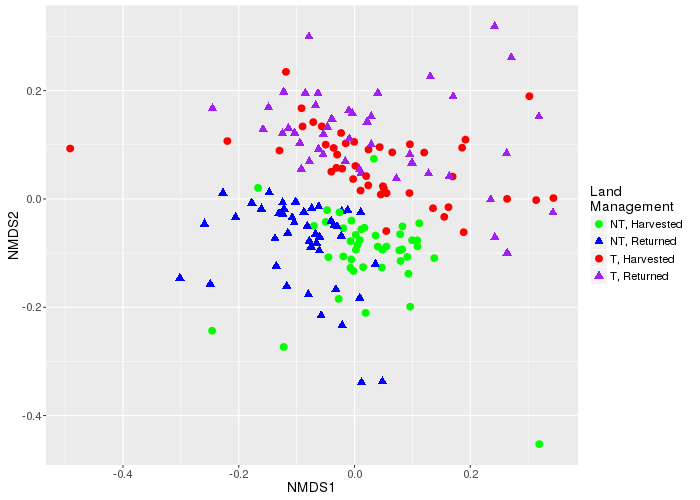

In [41]:
%%R -w 700 -h 500
#levels(p.nmds$Month)
#p.nmds$Month <- factor(p.nmds$Month, levels = c("July", "September", "October", "November"))
#levels(p.nmds$Month)

asNumeric = function(x) { as.numeric(as.character(x)) }

p.nmds1 = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = Land_Management, shape = Land_Management), size = 3) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        theme(text = element_text(size = 14)) 



p.nmds1 = p.nmds1 + scale_color_manual(name="Land\nManagement", values = c('green', 'blue', 'red', 'purple'), 
                                       labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned')) +
                    scale_shape_manual(name="Land\nManagement", values = c(19, 17, 19, 17), 
                                       labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned'))


print(p.nmds1)

In [42]:
%%R
ggsave(filename = "data/figs/LandManagement_ord.png", plot = p.nmds1, width =8, height =6)

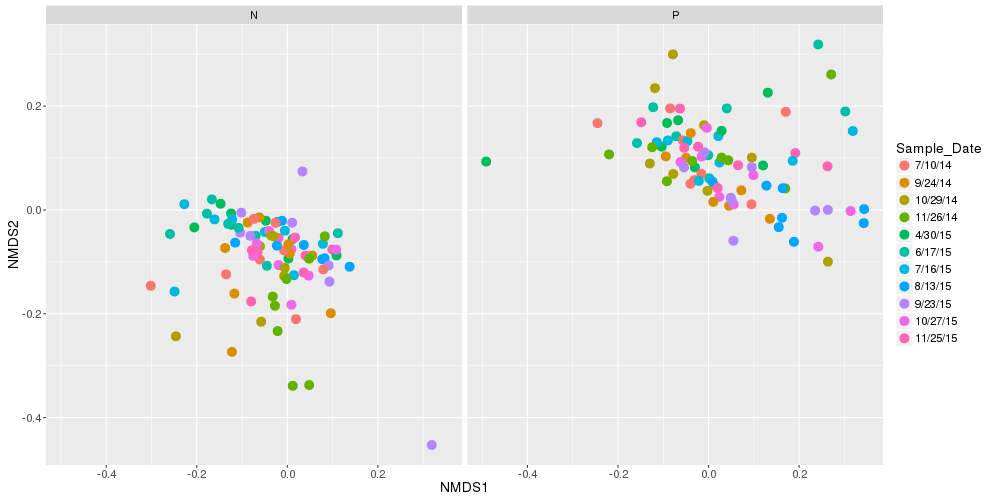

In [43]:
%%R -w 1000 -h 500

asNumeric = function(x) { as.numeric(as.character(x)) }


p.nmdsmonth = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = Sample_Date), size = 4) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        theme(text = element_text(size = 14)) + facet_grid(~Till) #+ scale_color_manual(values = monthcol)

#p.nmds1 = p.nmds1 + 
    #scale_color_brewer(name="Land\nManagement", palette = "Set1", 
    #labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned'))

print(p.nmdsmonth)

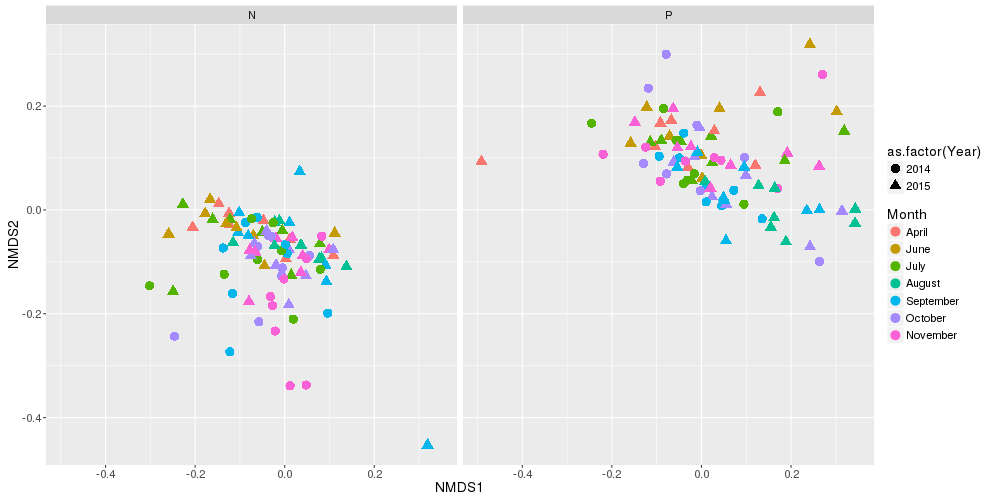

In [44]:
%%R -w 1000 -h 500

asNumeric = function(x) { as.numeric(as.character(x)) }


p.nmdsmonth = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = Month, shape = as.factor(Year)), size = 4) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        theme(text = element_text(size = 14)) + facet_grid(~Till) #+ scale_color_manual(values = monthcol)

#p.nmds1 = p.nmds1 + 
    #scale_color_brewer(name="Land\nManagement", palette = "Set1", 
    #labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned'))

print(p.nmdsmonth)

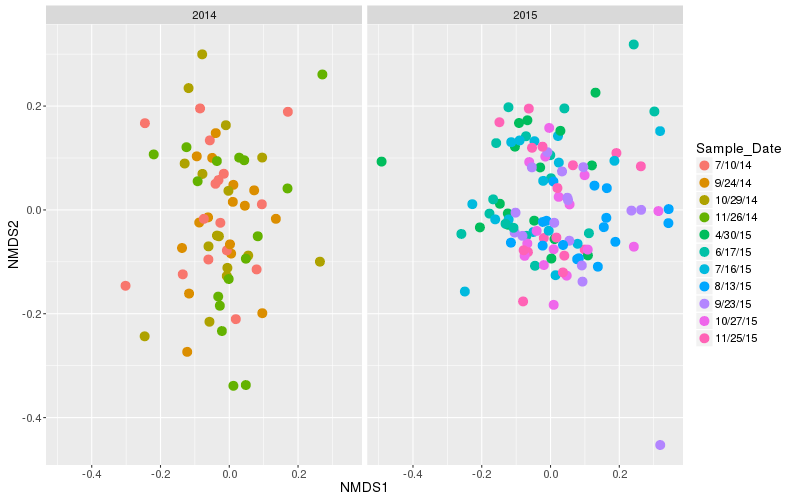

In [45]:
%%R -w 800 -h 500

asNumeric = function(x) { as.numeric(as.character(x)) }

monthcol = c("#F37A48",
"#628CFD",
"#DCCB44",
"#296484",
"#BF1A41",
"#06D582",
"#EC6C7A",
"#13D4CF",
"#82562A",
"#8ED36D",
"#207343")

p.nmdsmonth = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = Sample_Date), size = 4) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        theme(text = element_text(size = 14)) + # + scale_color_manual(values = monthcol) 
        facet_wrap(~Year)

#p.nmds1 = p.nmds1 + 
    #scale_color_brewer(name="Land\nManagement", palette = "Set1", 
    #labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned'))

print(p.nmdsmonth)

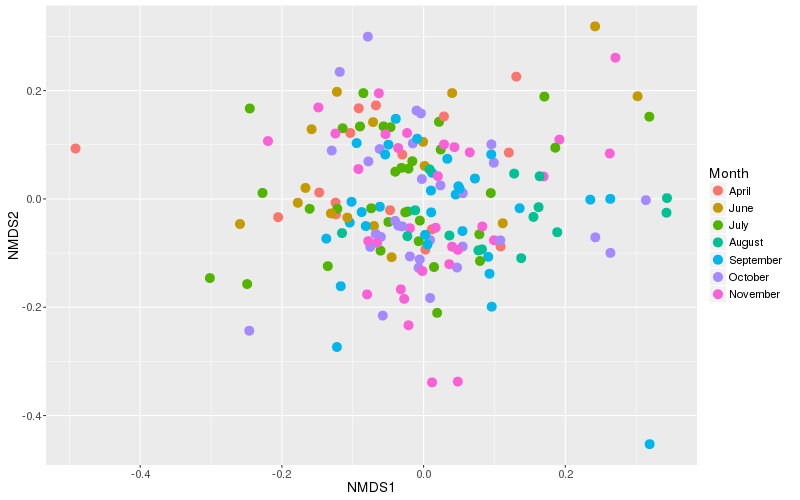

In [46]:
%%R -w 800 -h 500

asNumeric = function(x) { as.numeric(as.character(x)) }

p.nmdsmonth = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = Month), size = 4) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        theme(text = element_text(size = 14))  # + scale_color_manual(values = monthcol) 
       

#p.nmds1 = p.nmds1 + 
    #scale_color_brewer(name="Land\nManagement", palette = "Set1", 
    #labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned'))

print(p.nmdsmonth)

In [47]:
%%R
ggsave(filename = "data/figs/Time_ord.png", plot = p.nmdsmonth, width =8, height =6)

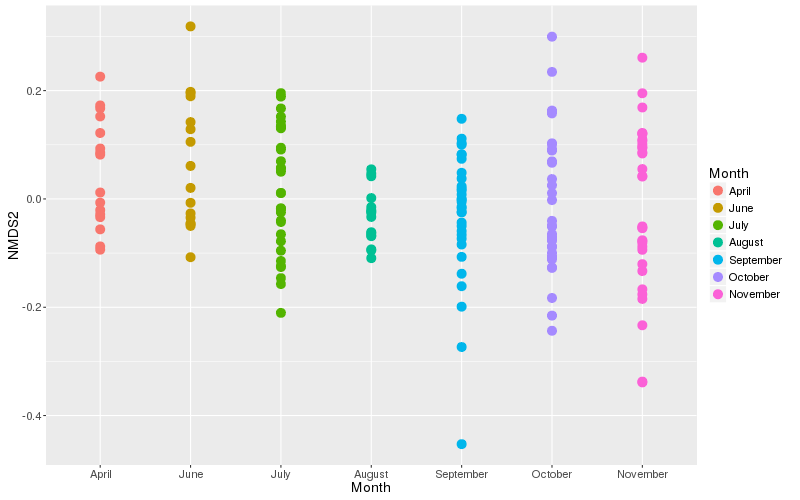

In [74]:
%%R -w 800 -h 500

asNumeric = function(x) { as.numeric(as.character(x)) }

p.nmdsmonth = ggplot(p.nmds, aes(x = Month, y = NMDS2)) +  
        geom_point(aes(color = Month), size = 4) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        theme(text = element_text(size = 14))  # + scale_color_manual(values = monthcol) 
       

#p.nmds1 = p.nmds1 + 
    #scale_color_brewer(name="Land\nManagement", palette = "Set1", 
    #labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned'))

print(p.nmdsmonth)

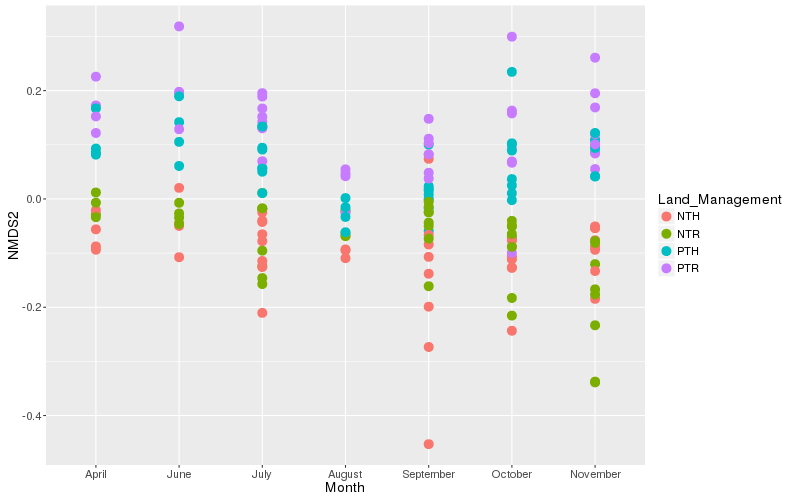

In [80]:
%%R -w 800 -h 500

asNumeric = function(x) { as.numeric(as.character(x)) }

p.nmdsmonth = ggplot(p.nmds, aes(x = Month, y = NMDS2)) +  
        geom_point(aes(color = Land_Management), size = 4) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        theme(text = element_text(size = 14))  # + scale_color_manual(values = monthcol) 
       

#p.nmds1 = p.nmds1 + 
    #scale_color_brewer(name="Land\nManagement", palette = "Set1", 
    #labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned'))

print(p.nmdsmonth)

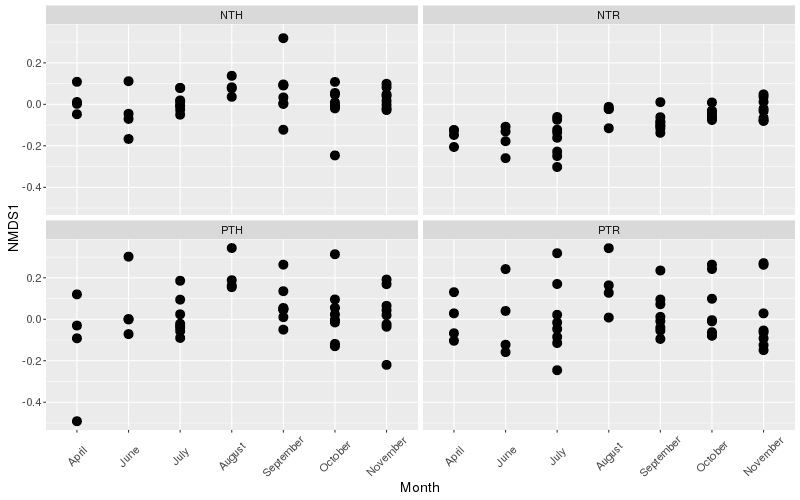

In [91]:
%%R -w 800 -h 500

asNumeric = function(x) { as.numeric(as.character(x)) }

p.nmdsmonth = ggplot(p.nmds, aes(x = Month, y = NMDS1)) +  
        geom_point(aes(), size = 4) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=3)))+
        theme(text = element_text(size = 14), axis.text.x = element_text(angle=45, vjust=0.5, hjust=0.5)) + 
        facet_wrap(~Treatment) 

#p.nmds1 = p.nmds1 + 
    #scale_color_brewer(name="Land\nManagement", palette = "Set1", 
    #labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned'))

print(p.nmdsmonth)

In [92]:
%%R
ggsave(filename = "data/figs/Time_NMDS1_byTreatment.png", plot = p.nmdsmonth, width =8, height =6)

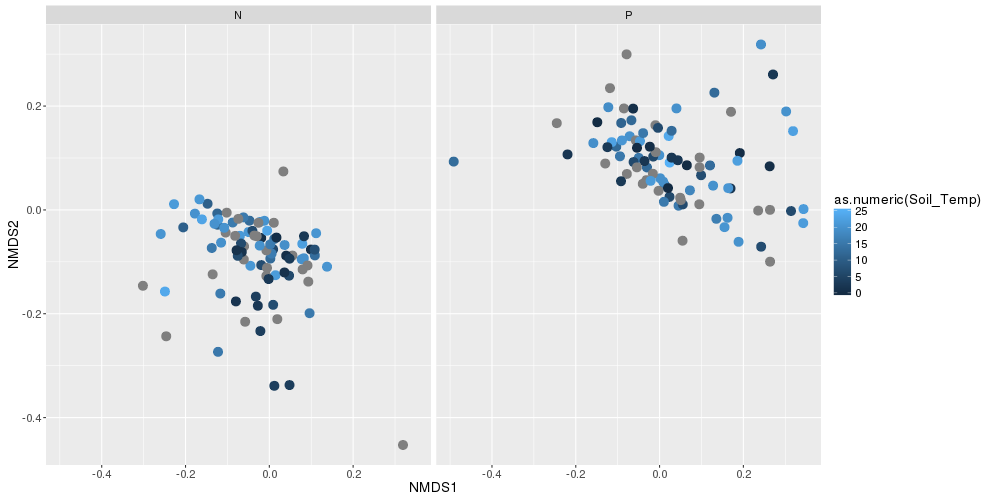

In [48]:
%%R -w 1000 -h 500

asNumeric = function(x) { as.numeric(as.character(x)) }

p.nmdsmonth = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = as.numeric(Soil_Temp)), size = 4) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        theme(text = element_text(size = 14)) + facet_wrap(~Till)

#p.nmds1 = p.nmds1 + 
    #scale_color_brewer(name="Land\nManagement", palette = "Set1", 
    #labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned'))

print(p.nmdsmonth)

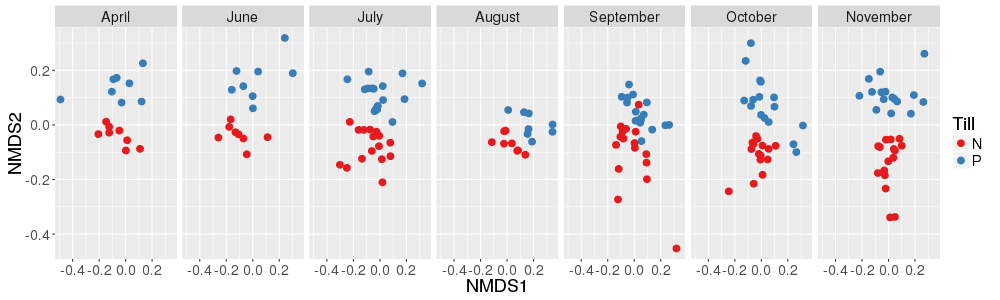

In [49]:
%%R -w 1000 -h 300
p.nmds3 = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = as.factor(Till)), size = 3) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        facet_grid(.~Month)+ theme(text = element_text(size = 18)) 


p.nmds3 = p.nmds3 + scale_color_brewer(name="Till", palette = "Set1")
print(p.nmds3)





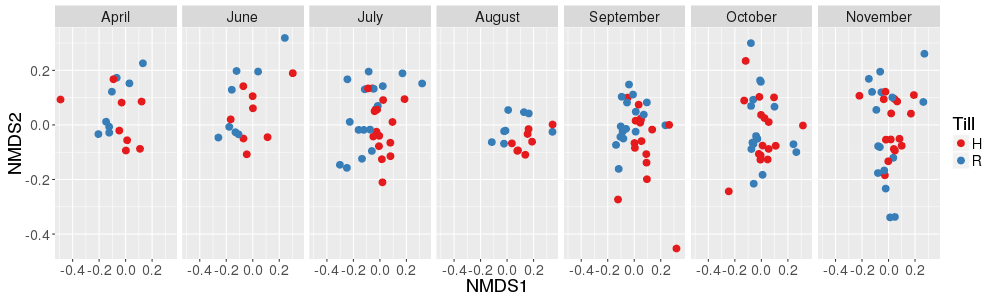

In [50]:
%%R -w 1000 -h 300
p.nmds3 = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = as.factor(OM)), size = 3) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        facet_grid(.~Month)+ theme(text = element_text(size = 18)) 


p.nmds3 = p.nmds3 + scale_color_brewer(name="Till", palette = "Set1")
print(p.nmds3)





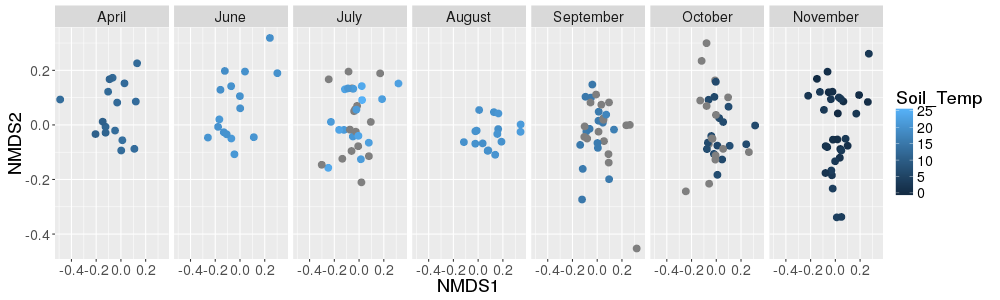

In [51]:
%%R -w 1000 -h 300
p.nmds3 = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = Soil_Temp), size = 3) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        facet_grid(.~Month)+ theme(text = element_text(size = 18)) 


print(p.nmds3)





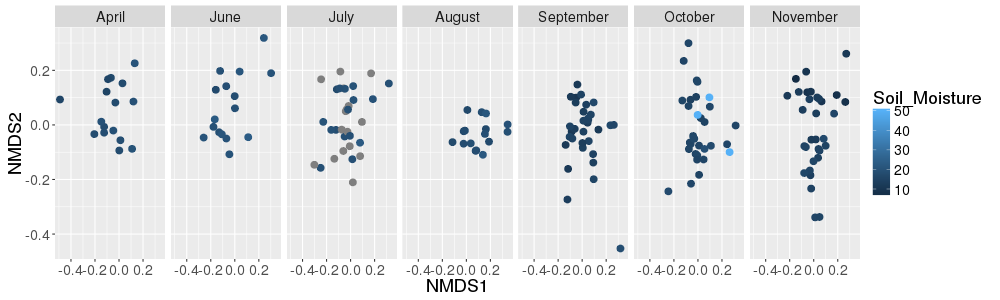

In [52]:
%%R -w 1000 -h 300
p.nmds3 = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = Soil_Moisture), size = 3) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        facet_grid(.~Month)+ theme(text = element_text(size = 18)) 


print(p.nmds3)





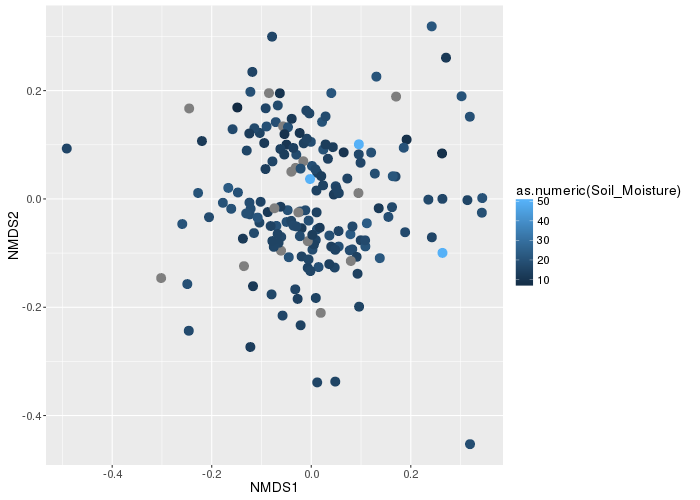

In [53]:
%%R -w 700 -h 500

asNumeric = function(x) { as.numeric(as.character(x)) }

p.nmdsmonth = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = as.numeric(Soil_Moisture)), size = 4) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        theme(text = element_text(size = 14)) 

#p.nmds1 = p.nmds1 + 
    #scale_color_brewer(name="Land\nManagement", palette = "Set1", 
    #labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned'))

print(p.nmdsmonth)

In [54]:
%%R
ggsave(filename = "data/figs/Month_ord.png", plot = p.nmdsmonth, width =8, height =6)

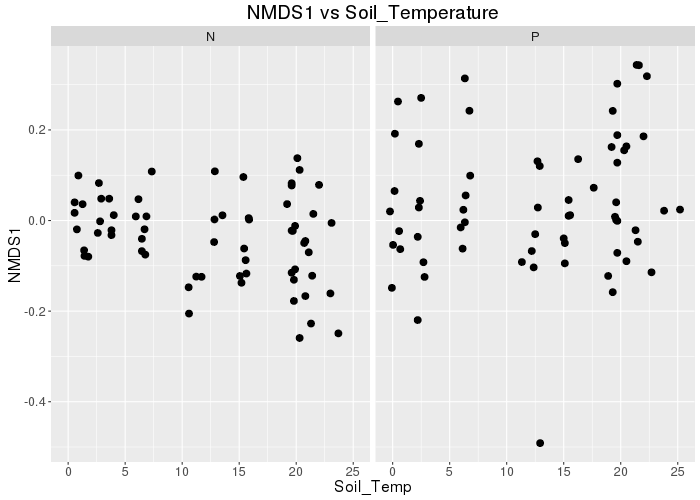

In [55]:
%%R -w 700 -h 500
p.nmds3 = ggplot(p.nmds, aes(x = Soil_Temp, y = NMDS1)) +  
        geom_point(size = 3)  +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        labs(title="NMDS1 vs Soil_Temperature")+ theme(text = element_text(size = 16)) + facet_wrap(~Till) 


p.nmds3 = p.nmds3 + scale_color_brewer(name="Month", palette = "Set1")

print(p.nmds3)

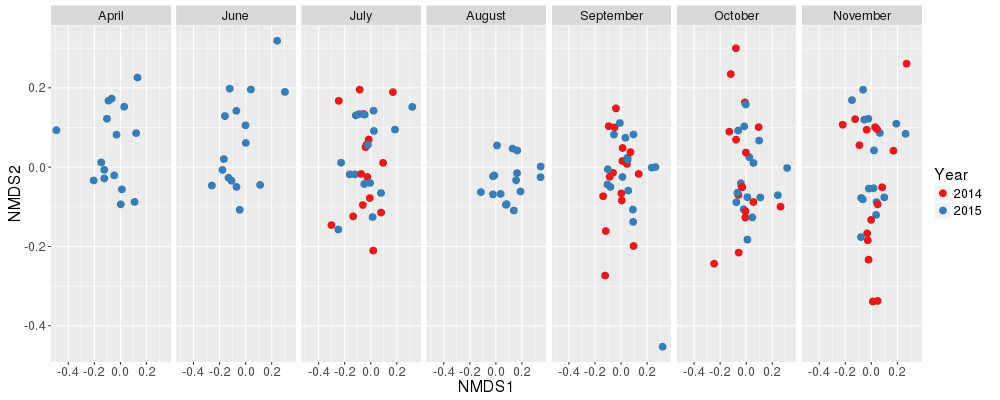

In [56]:
%%R -w 1000 -h 400
p.nmds3 = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = as.factor(Year)), size = 3) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        facet_grid(.~Month)+ theme(text = element_text(size = 16)) 


p.nmds3 = p.nmds3 + scale_color_brewer(name="Year", palette = "Set1")
print(p.nmds3)





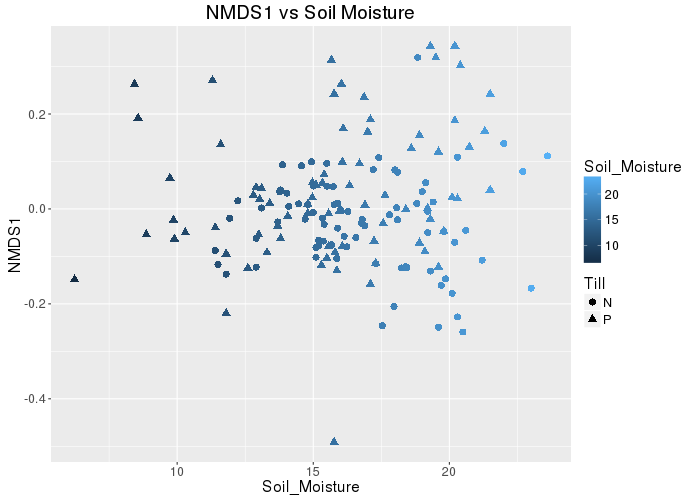

In [57]:
%%R -w 700 -h 500
p.nmds2 = filter(p.nmds, Soil_Moisture != 50)
p.nmds3 = ggplot(p.nmds2, aes(x = Soil_Moisture, y = NMDS1)) +  
        geom_point((aes(color = Soil_Moisture, shape = Till)), size = 3)  +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        labs(title="NMDS1 vs Soil Moisture")+ theme(text = element_text(size = 16)) 


#p.nmds3 = p.nmds3 + scale_color_brewer(name="Month", palette = "Set1")

print(p.nmds3)

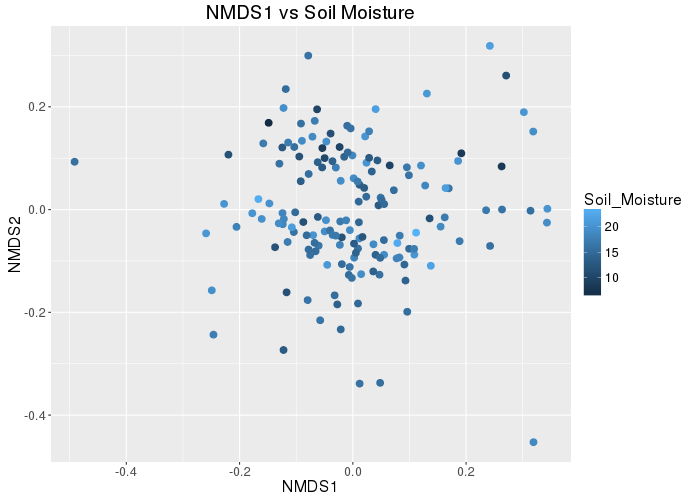

In [58]:
%%R -w 700 -h 500
p.nmds2 = filter(p.nmds, Soil_Moisture != 50)
p.nmds3 = ggplot(p.nmds2, aes(x = NMDS1, y = NMDS2)) +  
        geom_point((aes(color = Soil_Moisture)), size = 3)  +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        labs(title="NMDS1 vs Soil Moisture")+ theme(text = element_text(size = 16)) 


#p.nmds3 = p.nmds3 + scale_color_brewer(name="Month", palette = "Set1")

print(p.nmds3)

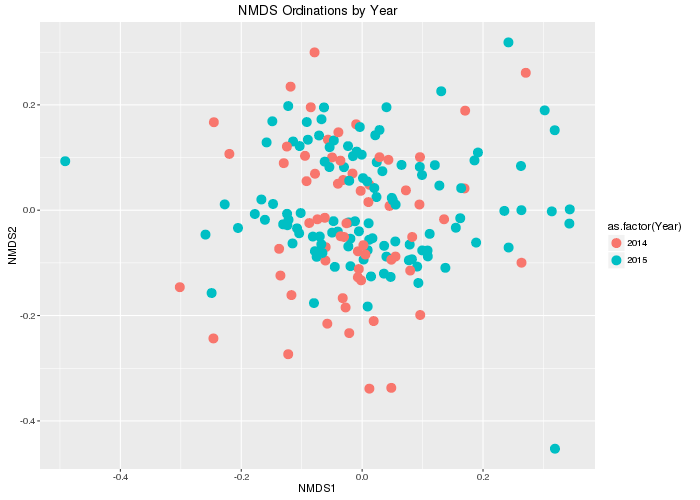

In [59]:
%%R -w 700 -h 500

levels(p.nmds$Month)
#p.nmds$Month <- factor(p.nmds$Month, levels = c("July", "September", "October", "November"))
levels(p.nmds$Month)

asNumeric = function(x) { as.numeric(as.character(x)) }

p.nmdsmonth = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = as.factor(Year)), size = 4) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        labs(title="NMDS Ordinations by Year") + scale_shape_manual(values = c(15,16,17,18))

print(p.nmdsmonth)

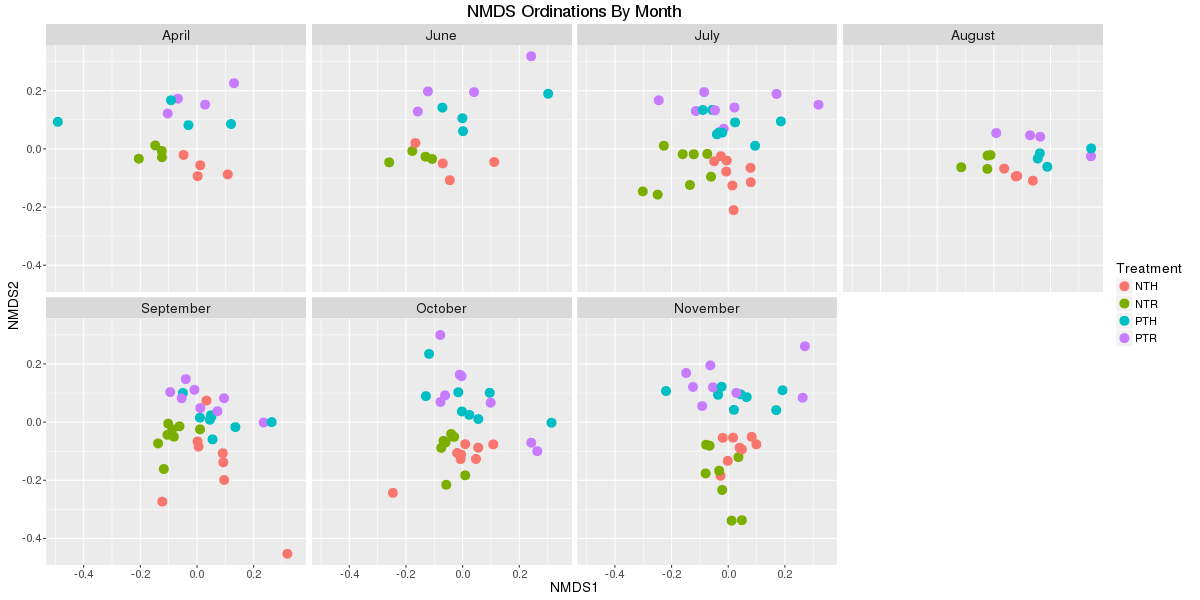

In [60]:
%%R -w 1200 -h 600


asNumeric = function(x) { as.numeric(as.character(x)) }

p.nmds1 = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = Treatment), size = 4) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        facet_wrap(~Month, ncol =4) + labs(title="NMDS Ordinations By Month")+ 
        theme(text = element_text(size = 14), strip.text.x = element_text(size = 14))
print(p.nmds1)

In [61]:
%%R
ggsave(filename = "data/figs/MonthFacetted_ord.png", plot = p.nmds1, width =12, height =6)

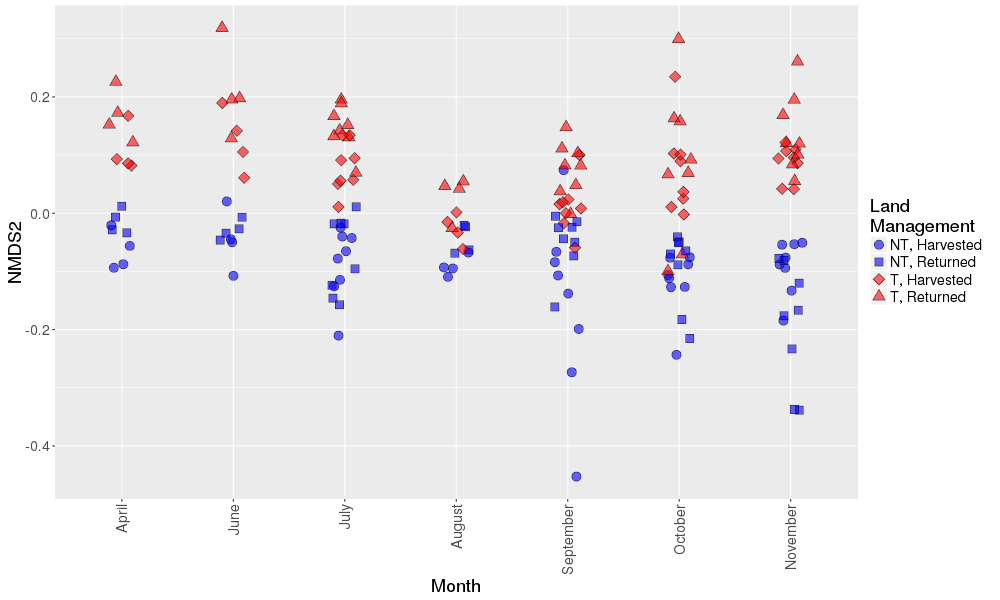

In [62]:
%%R -w 1000 -h 600
p = ggplot(p.nmds, aes(x = Month, y = NMDS2)) + 
    geom_jitter(aes(fill = as.factor(Land_Management),  shape = as.factor(Land_Management)), size = 4, width = 0.3, alpha = 0.6) + 
    scale_shape_manual(name = 'Land\nManagement', values = c(21,22,23,24),
                       labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned')) +
    theme(text = element_text(size = 18), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1))+
    scale_fill_manual(name="Land\nManagement", values = c('blue', 'blue', 'red', 'red'), 
                                       labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned'))

p

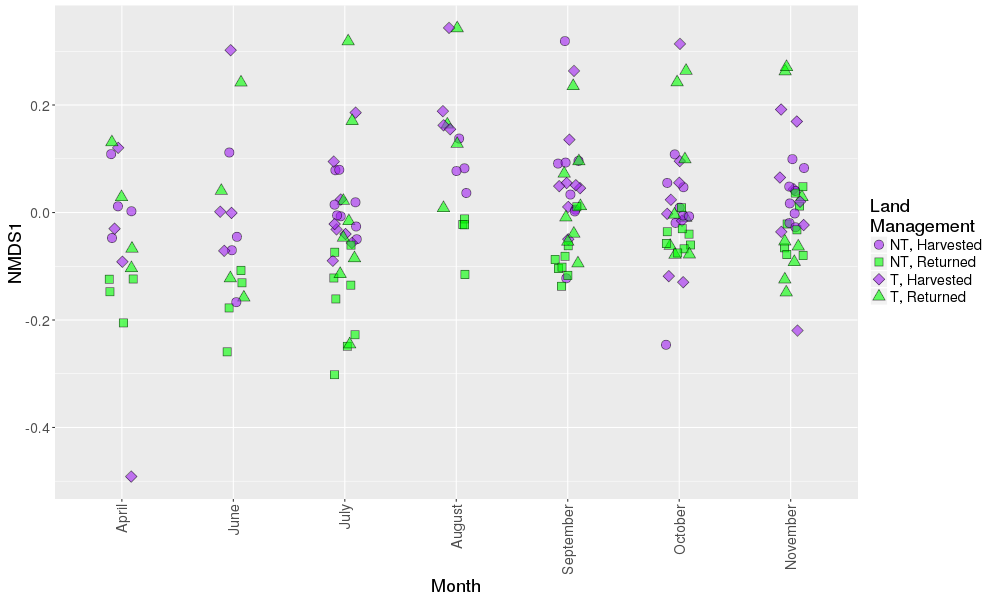

In [63]:
%%R -w 1000 -h 600
p = ggplot(p.nmds, aes(x = Month, y = NMDS1)) + 
    #geom_point(aes(color = as.factor(Till), shape = as.factor(Land_Management)), size = 3) +
    geom_jitter(aes(fill = as.factor(Land_Management), shape = as.factor(Land_Management)), size = 4, width = 0.3, alpha = 0.6) +
    scale_shape_manual(name = 'Land\nManagement', values = c(21,22,23,24),
                       labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned')) +
    theme(text = element_text(size = 18), axis.text.x = element_text(angle=90, vjust=0.5, hjust=1))+
    scale_fill_manual(name="Land\nManagement", values = c('purple', 'green', 'purple', 'green'), 
                                       labels = c('NT, Harvested', 'NT, Returned', 'T, Harvested', 'T, Returned'))

  

p

## Exploring alpha diversity

In [64]:
%%R

F = file.path(physeqDir, physeqBulk)
physeq.Bulk = readRDS(F)
physeq.Bulk.m = physeq.Bulk %>% sample_data
#physeq.Bulk.Sparsity = filter_taxa(physeq.Bulk, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)

physeq.Bulk.m = physeq.Bulk %>% sample_data

physeq.Bulk.core = prune_samples(physeq.Bulk.m$Land_Management != "PAS", physeq.Bulk)

physeq.Bulk.m = physeq.Bulk.core %>% sample_data
    
physeq.Bulk.core = physeq.Bulk.core %>% filter_taxa(function(x) sum(x) > 0, TRUE)

#print(physeq.Bulk.Sparsity)
print(physeq.Bulk.core)


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2093 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 2093 taxa by 7 taxonomic ranks ]


In [65]:
%%R
sample_data(physeq.Bulk.core)$Sample_Date = factor(sample_data(physeq.Bulk.core)$Sample_Date, 
                                        levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))

In [66]:
%%R
head(sample_data(physeq.Bulk.core))


Sample Data:        [6 samples by 24 sample variables]:
                  Full.sample Fraction PrimerF PrimerR Barcode Rev.index
April.NTR.4       April.NTR.4       NA  nBITSf   58A2r     155  atagtacc
Aug.NTR.3.2015 Aug.NTR.3.2015       NA  nBITSf   58A2r     129  gatctacg
April.PTR.3       April.PTR.3       NA  nBITSf   58A2r     150  acgtgcgc
July15.NTH.3     July15.NTH.3       NA  nBITSf   58A2r     184  aacgctga
Nov.NTR.1           Nov.NTR.1       NA  nBITSf   58A2r     125  tctctatg
June.NTH.2         June.NTH.2       NA  nBITSf   58A2r     162  gcgtatac
               Fwd.index Treatment Day Pool     Experiment Gradient
April.NTR.4     tagcgagt       NTR  NA    4 Chazy.ITS.Bulk     <NA>
Aug.NTR.3.2015  atcgtacg       NTR  NA    5 Chazy.ITS.Bulk     <NA>
April.PTR.3     cgtgagtg       PTR  NA    4 Chazy.ITS.Bulk     <NA>
July15.NTH.3    gacaccgt       NTH  NA    4 Chazy.ITS.Bulk     <NA>
Nov.NTR.1       tcatcgag       NTR  NA    4 Chazy.ITS.Bulk     <NA>
June.NTH.2      actatctg 

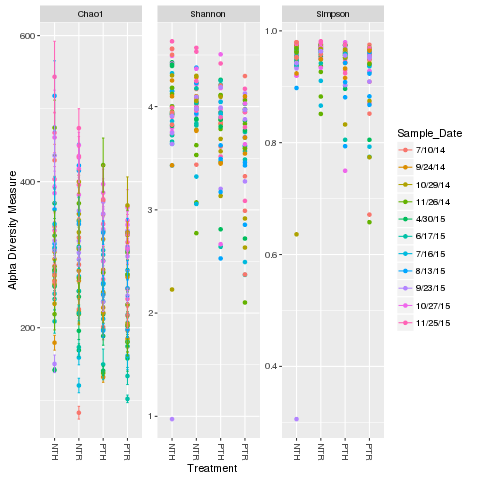

In [67]:
%%R
plot_richness(physeq.Bulk.core, x = "Treatment", measures = c("Chao1", "Shannon", 'Simpson'), color = 'Sample_Date')


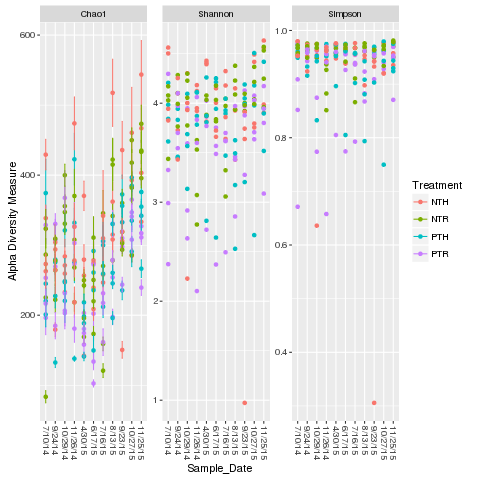

In [68]:
%%R
plot_richness(physeq.Bulk.core, x = "Sample_Date", measures = c("Chao1", "Shannon", 'Simpson'), color = 'Treatment')


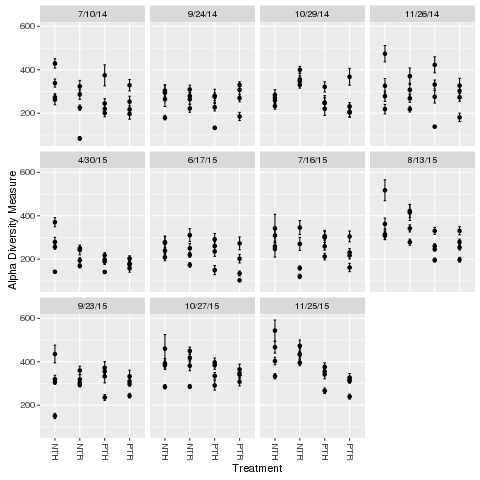

In [69]:
%%R
plot_richness(physeq.Bulk.core, x = "Treatment", measures = c("Chao1")) + facet_wrap(~Sample_Date)


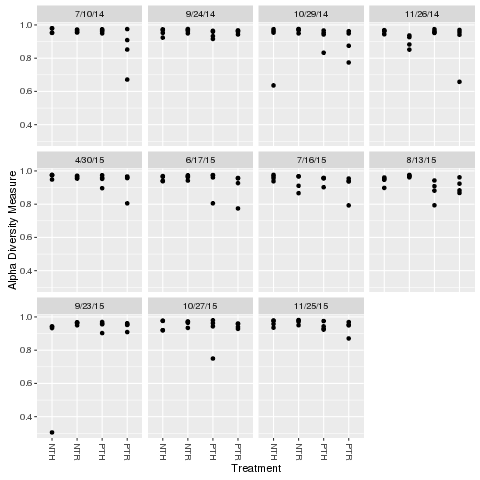

In [70]:
%%R
plot_richness(physeq.Bulk.core, x = "Treatment", measures = c("Simpson")) + facet_wrap(~Sample_Date)


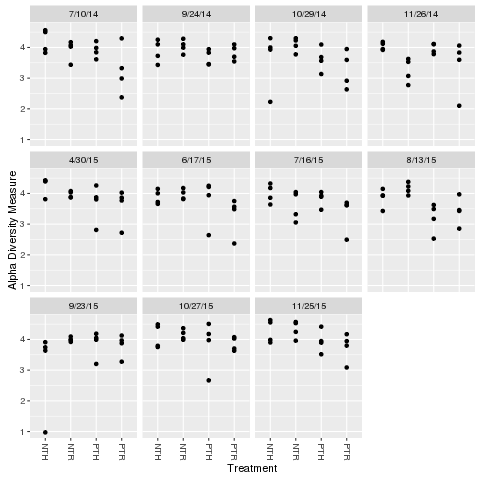

In [71]:
%%R
plot_richness(physeq.Bulk.core, x = "Treatment", measures = c("Shannon")) + facet_wrap(~Sample_Date)
